# Exploratory data analysis and data clean
### Data clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import danych
dataset = pd.read_excel('input/data.xlsx')

In [3]:
print('Zbiór zawiera {} obserwacji i {} zmiennych.'.format(dataset.shape[0], dataset.shape[1]))

Zbiór zawiera 93 obserwacji i 9 zmiennych.


In [4]:
print('Lista zmiennych dostępnych w zbiorze: {}'.format(list(dataset.columns)))

Lista zmiennych dostępnych w zbiorze: ['Cin', 'Cout', 'RE', 'OD', 'pH', 'CO2', 'dP', 'theta', 'EC']


> - **Cin** - stężenie wlotowe [ppm]
> - **Cout** - stężenie wylotowe [ppm]
> - **RE** - efektywność usuwania
> - **OD** - gęstość optyczna pożywki
> - **pH** - odczyn pożywki
> - **CO2** - stężenie ditlenku węgla na wylocie z instalacji [ppm]
> - **dP** - spadek ciśnienia mierzony w złożu biofiltra [Pa]
> - **Theta** - stosunek stężenia związku hydrofilowego do hydrofobowego
> - **EBRT** - Empty-Bed Residence Time (w naszym przypadku jest to stała)
> - **EC** - Zdolność eliminacji. (Cin-Cout)/EBRT

In [5]:
# rzut okiem na pierwsze dane
dataset.head(5)

Cin       Cout        RE     OD    pH          CO2         dP  theta  \
0  558.1122  494.29980  0.114336  0.311  7.85  2558.361773  15.665606  2.232   
1  767.4480  749.54940  0.023322  0.325  7.82  4341.200549  15.760575  3.070   
2  495.0780  166.98888  0.662702  0.326  7.77  1058.994025  17.637008  1.980   
3  349.5546  213.36960  0.389596  0.318  7.81  1971.682022  18.483861  1.398   
4  347.9982  183.79800  0.471842  0.335  7.86  1686.645744  16.061921  1.392   

           EC  
0   3828.7440  
1   1073.9160  
2  19685.3472  
3   8171.1000  
4   9852.0120

In [6]:
# info i typy danych
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cin     93 non-null     float64
 1   Cout    93 non-null     float64
 2   RE      93 non-null     float64
 3   OD      93 non-null     float64
 4   pH      93 non-null     float64
 5   CO2     93 non-null     float64
 6   dP      93 non-null     float64
 7   theta   93 non-null     float64
 8   EC      93 non-null     float64
dtypes: float64(9)
memory usage: 6.7 KB


In [7]:
# podstawowe podsumowanie zbioru
dataset.describe()

Cin         Cout         RE         OD         pH          CO2  \
count    93.000000    93.000000  93.000000  93.000000  93.000000    93.000000   
mean    494.748248   149.959500   0.692078   0.334284   7.987849  1303.763775   
std     388.791059   304.723765   0.253461   0.089628   0.170936   933.938285   
min     117.028440     2.333400   0.023322   0.087000   7.760000   236.089000   
25%     274.847400    56.316400   0.565857   0.308000   7.860000   519.383000   
50%     372.122400    85.122240   0.732553   0.342000   7.940000  1180.582990   
75%     621.241200   169.167840   0.926736   0.375000   8.080000  1786.196982   
max    3391.538400  2848.354800   0.994420   0.629000   8.410000  4341.200549   

               dP      theta            EC  
count   93.000000  93.000000     93.000000  
mean   106.506716   1.289320  20687.324890  
std    119.126677   1.623284  14988.851874  
min     15.234557   0.000100   1073.916000  
25%     29.647650   0.629821  10020.103200  
50%     61.560000   1.031000  16490.112000  
75%    123.973316   1.448000  29005.503600  
max    483.200000  13.566000  70691.688000

In [8]:
# sprawdzenie czy występują jakieś braki
nulls_summary = pd.DataFrame(dataset.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(dataset.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((dataset.isnull().mean()*100),2)
print(nulls_summary)

       Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Cin    False                   0               0.0
Cout   False                   0               0.0
RE     False                   0               0.0
OD     False                   0               0.0
pH     False                   0               0.0
CO2    False                   0               0.0
dP     False                   0               0.0
theta  False                   0               0.0
EC     False                   0               0.0


### Rozkład poszczególnych wartości

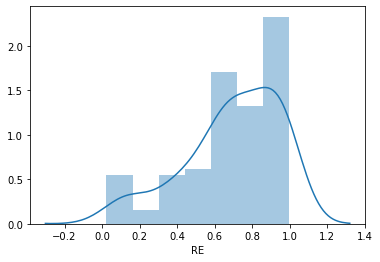

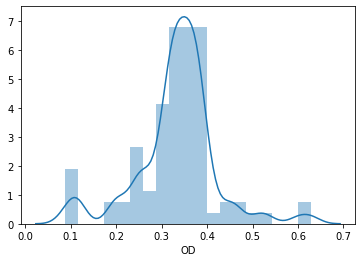

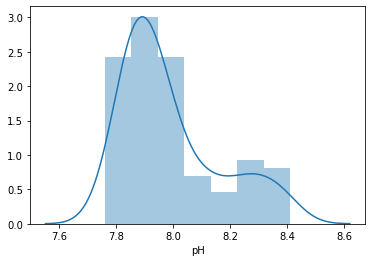

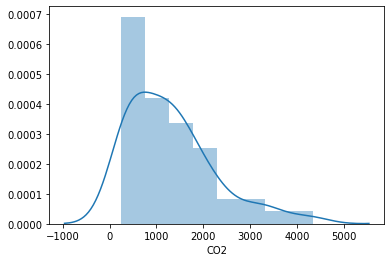

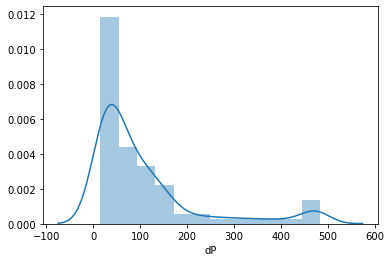

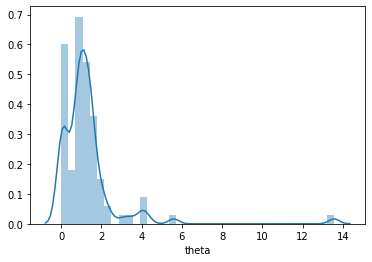

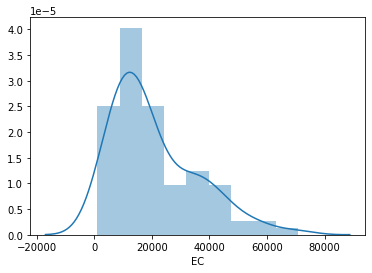

In [9]:
# rozkład zmiennych 
for i in range(len(dataset.columns)):
    data=dataset.copy()
    columnName = data.columns[i]
    plt.figure()  
    sns.distplot(data[columnName])

### Mapa korelacji dla poszczególnych zmiennych

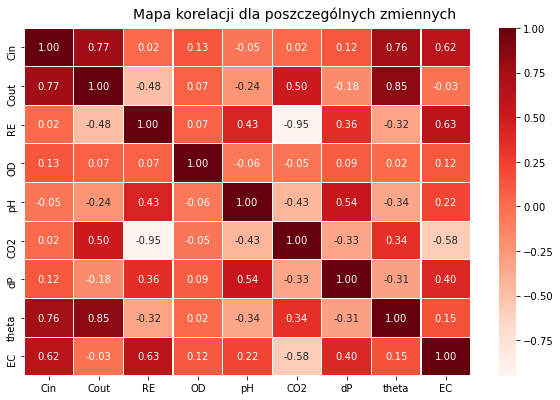

In [10]:
# mapa korelacji
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mapa korelacji dla poszczególnych zmiennych', fontsize=14)

### Zapisz wyczyszczoną wersję danych

In [11]:
dataset.head()

Cin       Cout        RE     OD    pH          CO2         dP  theta  \
0  558.1122  494.29980  0.114336  0.311  7.85  2558.361773  15.665606  2.232   
1  767.4480  749.54940  0.023322  0.325  7.82  4341.200549  15.760575  3.070   
2  495.0780  166.98888  0.662702  0.326  7.77  1058.994025  17.637008  1.980   
3  349.5546  213.36960  0.389596  0.318  7.81  1971.682022  18.483861  1.398   
4  347.9982  183.79800  0.471842  0.335  7.86  1686.645744  16.061921  1.392   

           EC  
0   3828.7440  
1   1073.9160  
2  19685.3472  
3   8171.1000  
4   9852.0120

In [12]:
dataset.to_csv('input/clean_data.csv', index=False)